In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
from scipy.stats import shapiro

Шаг 1

In [2]:

dataframe = pd.read_csv("ds_salaries.csv")

print("\nВсе количественные столбцы имеют числовой тип:")
print(dataframe.info())

print("\nВ колонках отсутсвуют пропущенные значения:")
print(dataframe.isnull().sum())
dataframe


Все количественные столбцы имеют числовой тип:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None

В колонках отсутсвуют пропущенные значения:
Unnamed: 0            0
work_year             0
experience_level      0
em

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
# new_df = dataframe.copy()

# #non int64
# non_int = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

# unique_eml_type = new_df['employment_type']
# print(unique_eml_type)

# # Создаем словарь для присвоения числовых кодов категориальным значениям
# code_dict_exp_lvl = {'EN': 1, 'MI': 2, 'SE': 3, 'EX' : 4}
# experience_levels_from_df = new_df['experience_level']

# new_df['experience_level'] = [code_dict_exp_lvl[value] for value in experience_levels_from_df]

# new_df



Функция - возвращает датафрейм как массив словарей

In [4]:
#поменять залоголок столбца на понятный
dataframe.rename(columns={'Unnamed: 0': 'RowID'}, inplace=True)

def getDataframeAsArrayOfDictionarys():
    return dataframe.to_dict(orient='records')

# getDataframeAsArrayOfDictionarys()

Шаг 2

In [21]:
print("\nОписательные статистики по колонкам (среднее, мода, медиана, стандартное отклонение, квартили):")
print(dataframe.describe())
mode = dataframe.experience_level.mode()[0]  
m = ['experience_level', "employment_type", 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
print("\nЗначение моды для колонок:")
for i in list(dataframe):
  print(f"{i}: {dataframe[i].mode()[0]}")


Описательные статистики по колонкам (среднее, мода, медиана, стандартное отклонение, квартили):
            RowID    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000

Значение моды для колонок:
RowID: 0
work_year: 2022
experience_level: SE
employment_type: FT
job_title: Data Scientist
salary: 80000
salary_currency: USD
salary_in_usd: 100000
employee_residence: US
remote_ratio: 100
company_location: U

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


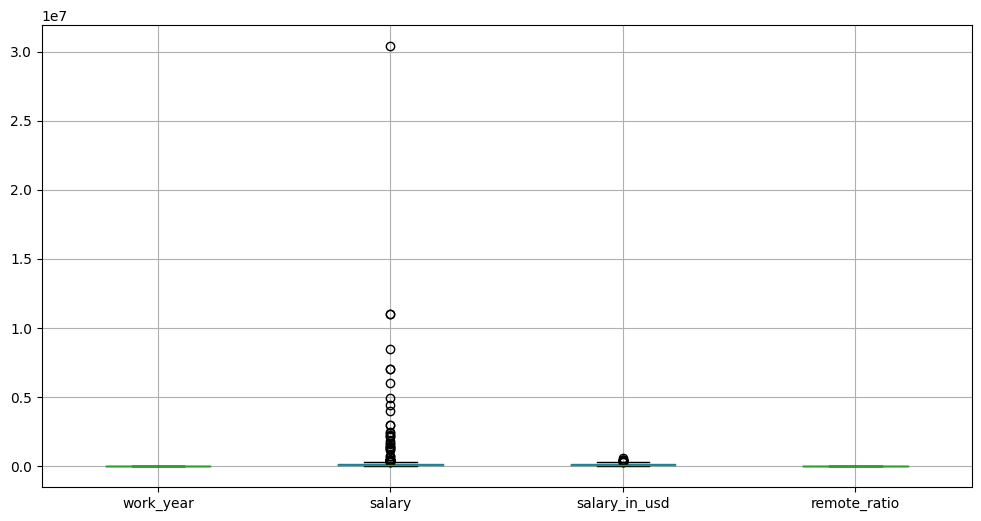

In [6]:
inter_cols = ["work_year",'salary', "salary_in_usd", "remote_ratio"]

plt.rcParams["figure.figsize"] = 12, 6
dataframe[inter_cols].boxplot();
print(inter_cols)

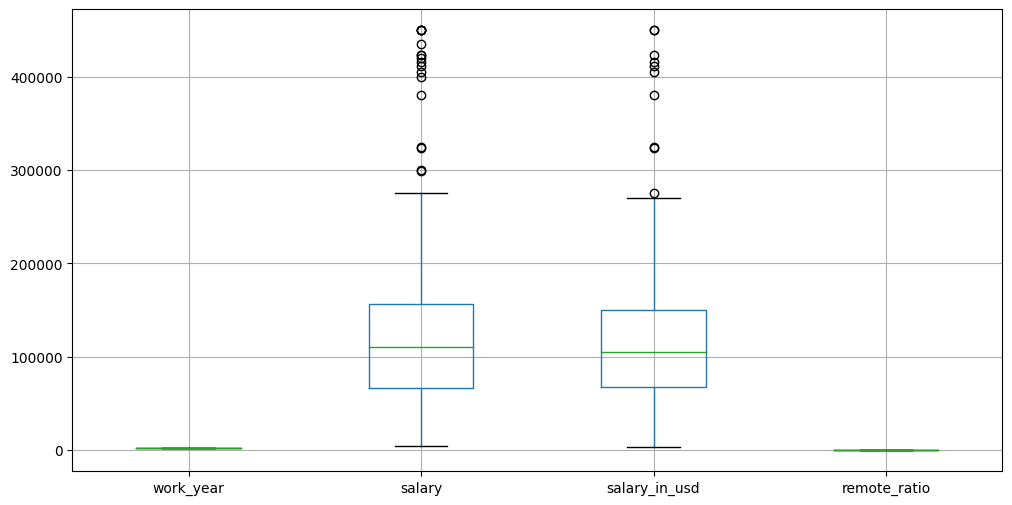

In [13]:
ndf = dataframe.copy()
ndf = ndf[ndf['salary_in_usd'] < 500000].copy()
ndf = ndf[ndf['salary'] < 700000].copy()
ndf[inter_cols].boxplot()
plt.show()


In [26]:
stat, p = shapiro(ndf["salary_in_usd"])
print("Тест Шапиро-Уилка:")
print("stat=%.3f, p-value=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Данные распределены нормально")
else:
    print("Данные не распределены нормально")

Тест Шапиро-Уилка:
stat=0.923, p-value=0.000
Данные не распределены нормально


In [30]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(ndf["salary_in_usd"])

alpha = 0.05
if p > alpha:
    print("Данные упорядочены")
else:
    print("Данные не упорядочены")


Данные не упорядочены
